Linear Regression (Binary Classification) Practice

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#Loading Dataset 
df = pd.read_csv("car_ownership.csv")

#quick checks 
print(df.shape)
print(df.head())
print(df.info())

(27, 2)
   monthly_salary  owns_car
0           22000         0
1           25000         0
2           47000         1
3           52000         0
4           46000         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   monthly_salary  27 non-null     int64
 1   owns_car        27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes
None


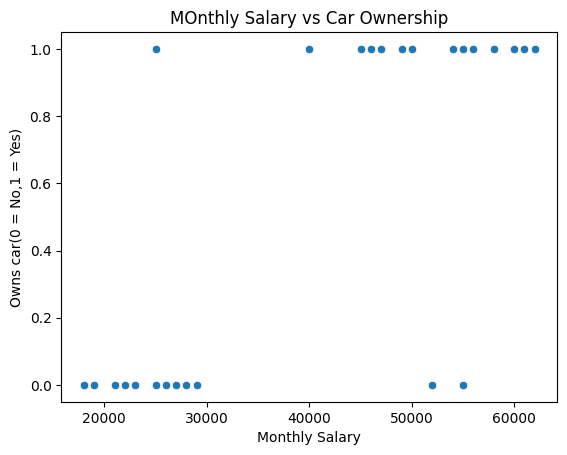

In [3]:
#visualize the realtionship 
sns.scatterplot(x = "monthly_salary",y = "owns_car",data = df)
plt.title("MOnthly Salary vs Car Ownership")
plt.xlabel("Monthly Salary")
plt.ylabel("Owns car(0 = No,1 = Yes)")
plt.show()

In [5]:
# Split data into X(features) and y (target)
X = df[["monthly_salary"]]   # predictor
y = df["owns_car"]           # target

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 21
Test size: 6


In [7]:
from sklearn.linear_model import LogisticRegression
#initialize the model 
log_reg = LogisticRegression()

#Train the model 
log_reg.fit(X_train,y_train)
#Evaluate accuracy on test set 
accuracy = log_reg.score(X_test,y_test)
print("Model Accuracy:" , accuracy)

Model Accuracy: 1.0


Probabilities & Predictions

In [8]:
# Predict probabilities
y_pred_prob = log_reg.predict_proba(X_test)

# Predict class labels
y_pred = log_reg.predict(X_test)

print("Predicted probabilities:\n", y_pred_prob)
print("Predicted labels:", y_pred)
print("True labels:", list(y_test.values))

Predicted probabilities:
 [[0.05404093 0.94595907]
 [0.70600413 0.29399587]
 [0.06013358 0.93986642]
 [0.77134478 0.22865522]
 [0.84145222 0.15854778]
 [0.72895826 0.27104174]]
Predicted labels: [1 0 1 0 0 0]
True labels: [np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0)]


In [9]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict labels again
y_pred = log_reg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[4 0]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


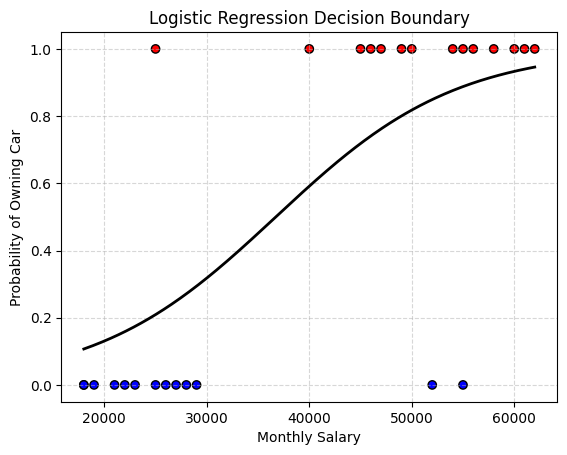

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a salary range for plotting
X_range = np.linspace(df["monthly_salary"].min(), df["monthly_salary"].max(), 300).reshape(-1, 1)

# Predicted probabilities across the salary range
y_prob = log_reg.predict_proba(X_range)[:,1]

# Plot data points
plt.scatter(df["monthly_salary"], df["owns_car"], c=df["owns_car"], cmap="bwr", edgecolor="k")
plt.plot(X_range, y_prob, color="black", linewidth=2)

plt.xlabel("Monthly Salary")
plt.ylabel("Probability of Owning Car")
plt.title("Logistic Regression Decision Boundary")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()